Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Cargar y explorar el dataset

In [2]:
df = pd.read_csv('../data/youtube.csv')
df.head(2)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False


Información básica del dataset

In [3]:
print("INFORMACIÓN BÁSICA DEL DATASET")
print("\nDimensiones del dataset:", df.shape)
print("\nColumnas del dataset:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())

INFORMACIÓN BÁSICA DEL DATASET

Dimensiones del dataset: (1000, 15)

Columnas del dataset: ['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

Tipos de datos:
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

Valores faltantes:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomopho

Definir las columnas de toxicidad para el análisis

In [4]:
toxic_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 
                'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 
                'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']


Calcular estadísticas de toxicidad

In [5]:
print("DISTRIBUCIÓN DE VARIABLES DE TOXICIDAD")
# Contar el total de cada tipo de toxicidad
toxic_stats = df[toxic_columns].sum()
# Calcular porcentajes
toxic_percentages = (df[toxic_columns].sum() / len(df) * 100).round(2)

# Crear DataFrame con las estadísticas
stats_df = pd.DataFrame({
    'Total': toxic_stats,
    'Porcentaje': toxic_percentages
})
print("\nEstadísticas de toxicidad:")
print(stats_df)

DISTRIBUCIÓN DE VARIABLES DE TOXICIDAD

Estadísticas de toxicidad:
                 Total  Porcentaje
IsToxic            462        46.2
IsAbusive          353        35.3
IsThreat            21         2.1
IsProvocative      161        16.1
IsObscene          100        10.0
IsHatespeech       138        13.8
IsRacist           125        12.5
IsNationalist        8         0.8
IsSexist             1         0.1
IsHomophobic         0         0.0
IsReligiousHate     12         1.2
IsRadicalism         0         0.0


Interpretación de los resultados_

- Proporción de Toxicidad: El 46.2% de los comentarios son tóxicos, lo que indica una alta prevalencia de toxicidad en el dataset.
- Tipos más comunes de toxicidad: El abuso verbal (35.3%) es el más frecuente, seguido por contenido provocativo (16.1%) y discurso de odio (13.8%). Otros tipos como racismo y obscenidades también están presentes en una proporción significativa.
- Tipos menos comunes: Comentarios homofóbicos, radicales, sexistas, nacionalistas y con odio religioso son muy pocos o inexistentes.
- Observaciones: La discrepancia entre el total de toxicidad y las categorías específicas sugiere que un comentario puede tener múltiples formas de toxicidad o que algunas categorías no se detectan adecuadamente.
- Implicaciones: La moderación debe centrarse en abuso, provocación, odio y racismo. Los sistemas de detección automática podrían necesitar más entrenamiento en categorías menos representadas.

Visualizar distribución de toxicidad

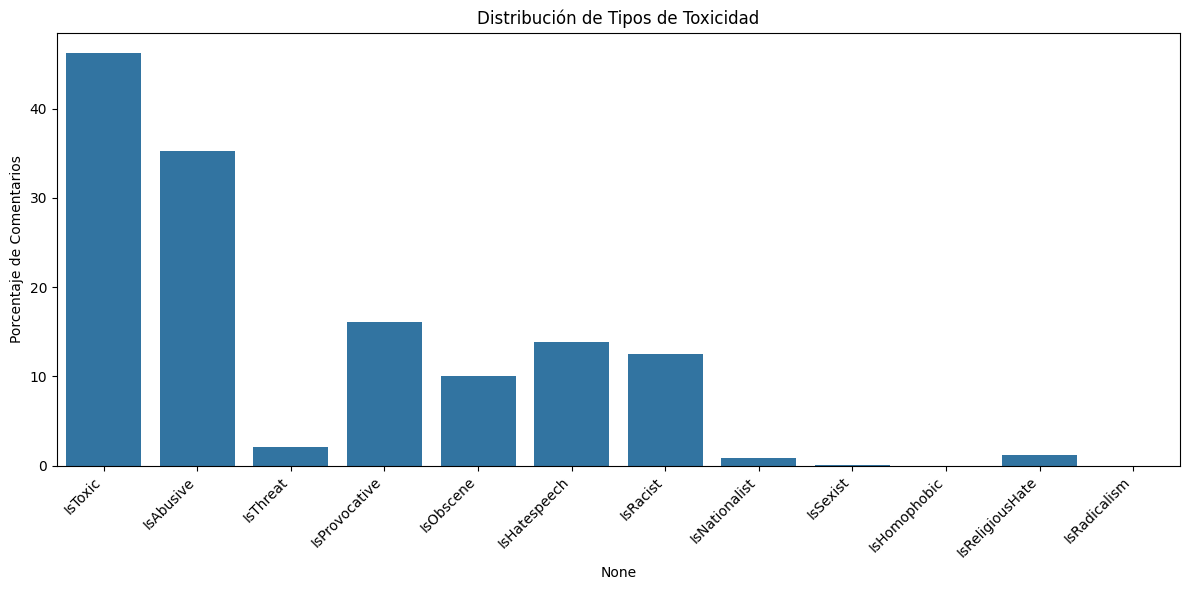

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=toxic_percentages.index, y=toxic_percentages.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Tipos de Toxicidad')
plt.ylabel('Porcentaje de Comentarios')
plt.tight_layout()
plt.show()

Interpretación del gráfico
Como ya habíamos observado en las estadísticas en este gráfico de barras se puedes corroborar que:

- Distribución de Toxicidad: El gráfico muestra que casi el 46% de los comentarios son tóxicos (IsToxic), con el abuso (IsAbusive) siendo la forma más común de toxicidad, seguido por contenido provocativo (IsProvocative).
- Categorías medianas: El discurso de odio (IsHatespeech), racismo (IsRacist) y obscenidades (IsObscene) son menos frecuentes pero aún significativas.
- Categorías menos frecuentes: Las amenazas (IsThreat) y el nacionalismo (IsNationalist) tienen baja representación, con algunas categorías como sexismo (IsSexist), homofobia (IsHomophobic) y radicalismo (IsRadicalism) siendo casi inexistentes.
- Observaciones: La distribución es sesgada, con pocas categorías dominando la toxicidad en el dataset.
- Implicaciones: La moderación debería enfocarse en las categorías más frecuentes, y las menos representadas podrían ser subdetectadas o necesitar ajustes en los criterios de clasificación.

Crear y visualizar la matriz de correlación

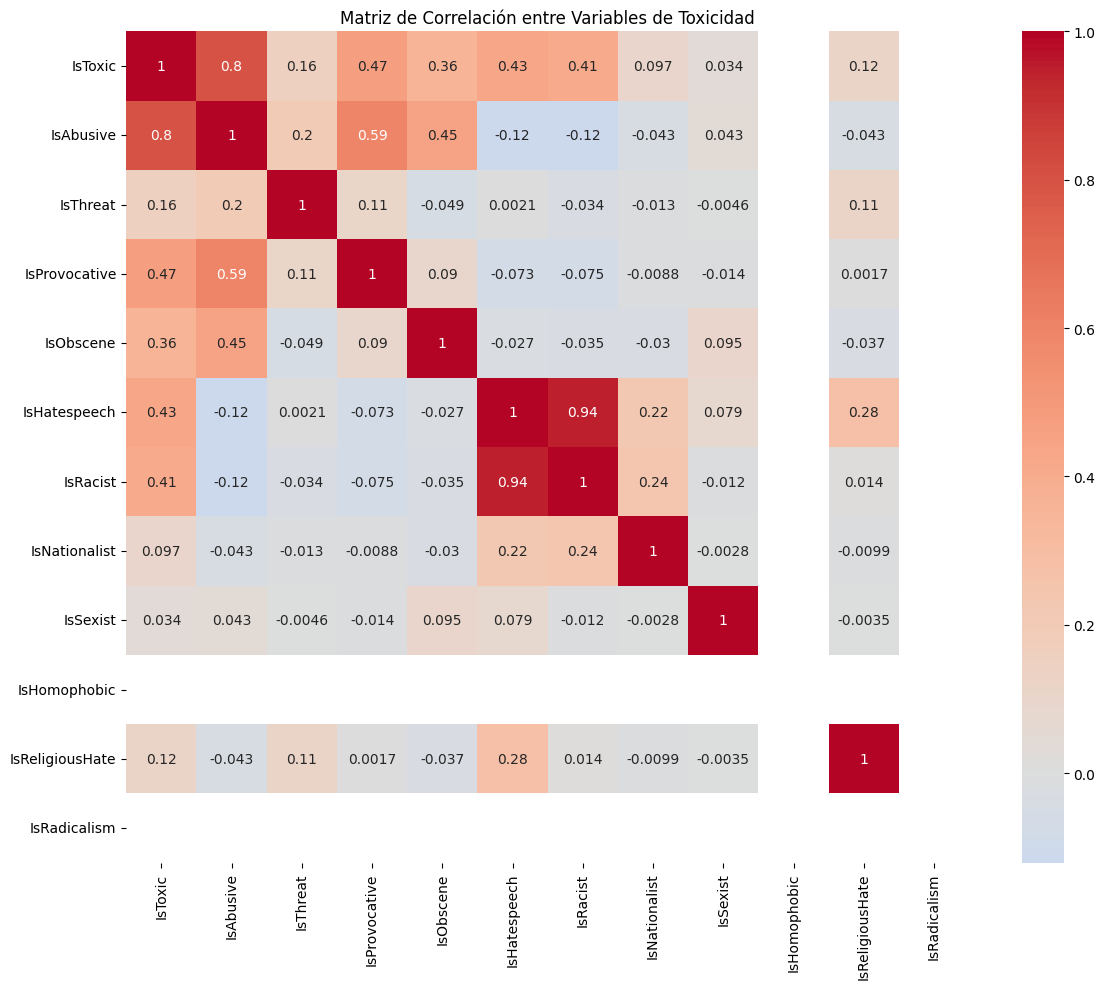

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[toxic_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables de Toxicidad')
plt.tight_layout()
plt.show()

Conclusión:

1. Correlaciones Fuertes Positivas:

- IsHatespeech e IsRacist (0.94): Hay una fuerte relación entre discurso de odio y racismo, cuando uno aparece, es probable que el otro también lo haga.
- IsToxic e IsAbusive (0.8): El abuso es un fuerte indicador de toxicidad general.
Correlaciones Moderadas Positivas:

- IsProvocative se correlaciona con IsAbusive (0.59) y IsToxic (0.47), sugiriendo que los comentarios provocativos suelen ser también abusivos y tóxicos.
- IsToxic tiene correlaciones moderadas con IsHatespeech (0.43) y IsRacist (0.41).
Correlaciones Débiles o Nulas:

- IsNationalist, IsSexist y IsReligiousHate tienen correlaciones bajas con otras variables, indicando que estos tipos de toxicidad tienden a ser más independientes.
Correlaciones Negativas:

- Se observa una ligera correlación negativa entre IsHatespeech/IsRacist y IsAbusive (-0.12), lo que sugiere que no suelen aparecer juntos.

2. Observaciones:

La matriz de correlaciones es simétrica, con correlación perfecta en la diagonal. IsHomophobic y IsRadicalism no muestran correlaciones debido a su ausencia en los datos.

Anállisis de la longitud del texto

In [8]:
df['text_length'] = df['Text'].str.len()

print("\n ESTADÍSTICAS DE LONGITUD DE TEXTO")
print("\nEstadísticas descriptivas de longitud de texto:")
print(df['text_length'].describe())


 ESTADÍSTICAS DE LONGITUD DE TEXTO

Estadísticas descriptivas de longitud de texto:
count    1000.000000
mean      185.554000
std       270.780777
min         3.000000
25%        47.000000
50%       101.000000
75%       217.000000
max      4421.000000
Name: text_length, dtype: float64


Visualizar distribución de longitud de texto según toxicidad

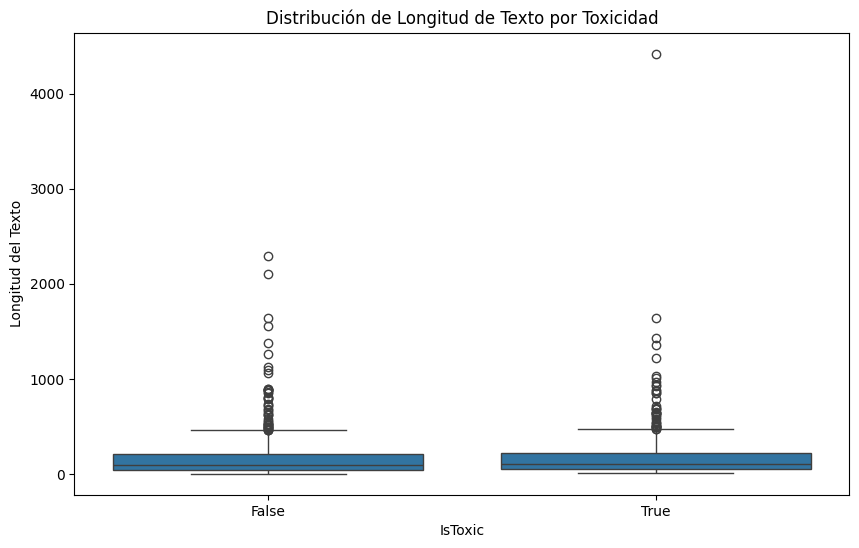

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsToxic', y='text_length', data=df)
plt.title('Distribución de Longitud de Texto por Toxicidad')
plt.ylabel('Longitud del Texto')
plt.show()

Conclusión:

1. Distribución general:
- Hay dos boxplots, uno para textos no tóxicos (False) y otro para textos tóxicos (True)
- El eje Y muestra la longitud del texto, que va de 0 hasta aproximadamente 4500 caracteres
- La mayoría de los textos en ambas categorías tienen una longitud entre 0 y 500 caracteres

2. Puntos específicos:
- Las cajas azules (que contienen el 50% de los datos) son muy similares en ambos casos
- Hay varios puntos outliers (círculos) por encima de las cajas, que representan textos especialmente largos
- El outlier más extremo está cerca de 4500 caracteres en la categoría no tóxica

3. Conclusiones principales:
- No parece haber una diferencia significativa en la longitud entre textos tóxicos y no tóxicos
- La mayoría de los textos son relativamente cortos
- Hay algunos casos excepcionales de textos muy largos en ambas categorías
- La distribución es bastante similar entre ambos grupos

4. Mediana:
- La línea horizontal dentro de cada caja (mediana) está en una posición similar para ambos grupos
- Esto sugiere que el "texto típico" tiene una longitud similar independientemente de si es tóxico o no

Análisis de co-ocurrencia de tipos de toxicidad

In [10]:
print("\n ANÁLISIS DE CO-OCURRENCIA DE TIPOS DE TOXICIDAD")
# Filtrar solo comentarios tóxicos y sumar ocurrencias de otros tipos
toxic_combinations = df[df['IsToxic']][toxic_columns[1:]].sum()
print("\nCo-ocurrencia en comentarios tóxicos:")
print(toxic_combinations)


 ANÁLISIS DE CO-OCURRENCIA DE TIPOS DE TOXICIDAD

Co-ocurrencia en comentarios tóxicos:
IsAbusive          353
IsThreat            21
IsProvocative      161
IsObscene          100
IsHatespeech       138
IsRacist           125
IsNationalist        8
IsSexist             1
IsHomophobic         0
IsReligiousHate     12
IsRadicalism         0
dtype: int64


Conclusión:
Esta salida muestra la frecuencia de diferentes tipos de toxicidad en los comentarios analizados. 

1. Tipos más frecuentes:
- IsAbusive (Abusivo): 353 casos - Es el tipo más común por una diferencia significativa
- IsProvocative (Provocativo): 161 casos - Segundo tipo más frecuente
- IsHatespeech (Discurso de odio): 138 casos
- IsRacist (Racista): 125 casos
- IsObscene (Obsceno): 100 casos

2. Tipos moderadamente presentes:
- IsThreat (Amenaza): 21 casos
- IsReligiousHate (Odio religioso): 12 casos
- IsNationalist (Nacionalista): 8 casos

3. Tipos menos frecuentes o ausentes:
- IsSexist (Sexista): solo 1 caso
- IsHomophobic (Homofóbico): 0 casos
- IsRadicalism (Radicalismo): 0 casos

Conclusiones principales:
- El abuso es la forma más común de toxicidad por un margen considerable
- Los contenidos provocativos, discurso de odio y racismo forman un segundo nivel de frecuencia
- Las amenazas directas son relativamente poco comunes
- Hay muy pocos casos de sexismo y ningún caso registrado de homofobia o radicalismo


Análisis estadístico de longitud de texto

In [11]:
print("\n ANÁLISIS ESTADÍSTICO")
# Separar longitudes de texto para comentarios tóxicos y no tóxicos
toxic_lengths = df[df['IsToxic']]['text_length']
non_toxic_lengths = df[~df['IsToxic']]['text_length']

# Realizar t-test
t_stat, p_value = stats.ttest_ind(toxic_lengths, non_toxic_lengths)
print("\nT-test para longitud de texto entre comentarios tóxicos y no tóxicos:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


 ANÁLISIS ESTADÍSTICO

T-test para longitud de texto entre comentarios tóxicos y no tóxicos:
t-statistic: 0.4147
p-value: 0.6785


Interpretación de los resultados

1. Estadístico t**
El valor del estadístico t es 0.4147. Este número se utiliza para calcular el valor p y determinar la significancia estadística

2. Valor p**
El valor p es 0.6785. Este es el dato más importante para la interpretación:

- Un valor p menor a 0.05 generalmente se considera estadísticamente significativo.
- En este caso, el valor p (0.6785) es mucho mayor que 0.05.

3. Conclusión

Dado que el valor p (0.6785) es considerablemente mayor que el nivel de significancia típico de 0.05, podemos concluir que:

-  No hay una diferencia estadísticamente significativa en la longitud de texto entre los comentarios tóxicos y no tóxicos.
- Cualquier diferencia observada en la longitud de texto entre comentarios tóxicos y no tóxicos es probablemente debida al azar y no a una diferencia real entre los grupos.

4. Implicaciones prácticas

Este resultado sugiere que la longitud del texto no es un factor determinante para distinguir entre comentarios tóxicos y no tóxicos. Es decir, los comentarios tóxicos no tienden a ser significativamente más largos o más cortos que los comentarios no tóxicos.


Análisis adicional: Distribución de comentarios por tipo de toxicidad

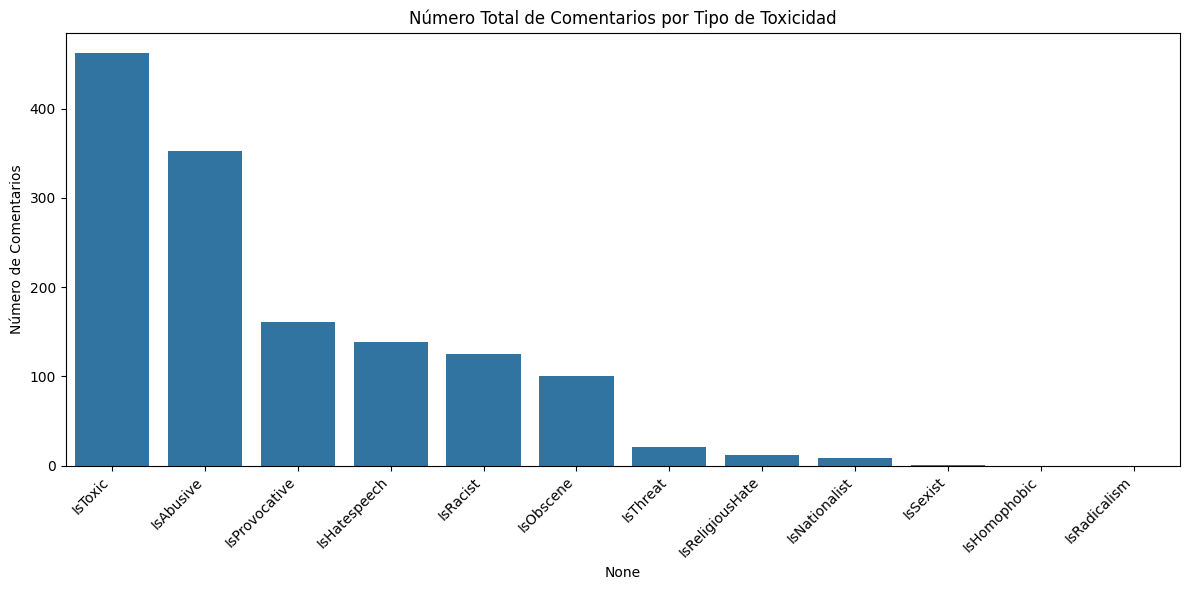

In [12]:
plt.figure(figsize=(12, 6))
toxic_counts = df[toxic_columns].sum().sort_values(ascending=False)
sns.barplot(x=toxic_counts.index, y=toxic_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Número Total de Comentarios por Tipo de Toxicidad')
plt.ylabel('Número de Comentarios')
plt.tight_layout()
plt.show()

Comprobar si la columna isToxic es una combinación del resto de columnas

In [13]:
def analyze_toxic_relationship(df):
    """
    Analiza si la variable isToxic es una combinación de las otras variables de toxicidad
    """
    # Crear una columna que combine todas las otras variables de toxicidad con OR
    toxic_columns = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
                    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
                    'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
    
    # Combinar todas las columnas de toxicidad con OR lógico
    df['combined_toxic'] = df[toxic_columns].any(axis=1)
    
    # Comparar con isToxic
    matches = (df['IsToxic'] == df['combined_toxic'])
    total_rows = len(df)
    matching_rows = matches.sum()
    
    # Encontrar casos donde no hay coincidencia
    mismatches = df[~matches]
    
    results = {
        'total_rows': total_rows,
        'matching_rows': matching_rows,
        'matching_percentage': (matching_rows / total_rows) * 100,
        'mismatches': mismatches
    }
    
    return results

# Ejecutar el análisis
results = analyze_toxic_relationship(df)

# Mostrar resultados
print(f"Total de filas analizadas: {results['total_rows']}")
print(f"Filas que coinciden: {results['matching_rows']}")
print(f"Porcentaje de coincidencia: {results['matching_percentage']:.2f}%")

print("\nEjemplos de casos donde no coinciden:")
print(results['mismatches'][['Text', 'IsToxic', 'combined_toxic'] + 
    ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
    'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']])

Total de filas analizadas: 1000
Filas que coinciden: 1000
Porcentaje de coincidencia: 100.00%

Ejemplos de casos donde no coinciden:
Empty DataFrame
Columns: [Text, IsToxic, combined_toxic, IsAbusive, IsThreat, IsProvocative, IsObscene, IsHatespeech, IsRacist, IsNationalist, IsSexist, IsHomophobic, IsReligiousHate, IsRadicalism]
Index: []


- Resultados clave: El análisis muestra que la variable 'IsToxic' coincide perfectamente con la combinación lógica (OR) de todas las otras variables de toxicidad en el conjunto de datos, sin discrepancias. Todas las filas (1000) coinciden al 100% en la clasificación.

- Implicaciones: La perfecta correlación sugiere que 'IsToxic' puede ser redundante y que el proceso de etiquetado ha sido preciso. Para futuros análisis, se podría simplificar el modelo usando solo una de las dos fuentes de información (ya sea 'IsToxic' o las variables específicas).

- Conclusión: Los datos son confiables y consistentes, lo que respalda la validez del conjunto de datos y sugiere que se podría profundizar en las subcategorías de toxicidad para obtener análisis más detallados.

In [14]:
print(df.columns)


Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism', 'text_length', 'combined_toxic'],
      dtype='object')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17624\1453552172.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_status', data=df, palette="viridis")


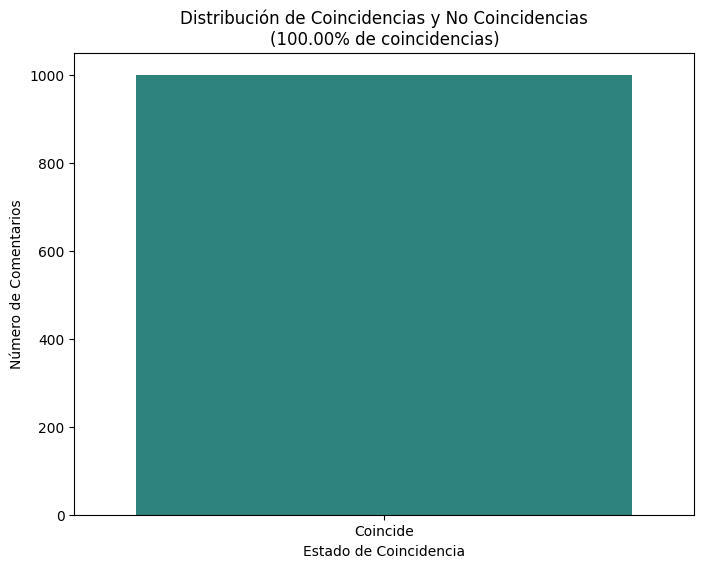


Ejemplos de casos donde no coinciden:
Empty DataFrame
Columns: [Text, IsToxic, combined_toxic, IsAbusive, IsThreat, IsProvocative, IsObscene, IsHatespeech, IsRacist, IsNationalist, IsSexist, IsHomophobic, IsReligiousHate, IsRadicalism]
Index: []


In [15]:
def visualize_toxic_relationship(df, results):
    """
    Visualiza las coincidencias y no coincidencias entre 'IsToxic' y 'combined_toxic'.
    """
    # Crear un DataFrame para visualizar los resultados
    match_status = ['Coincide' if x else 'No Coincide' for x in (df['IsToxic'] == df['combined_toxic'])]
    df['match_status'] = match_status
    
    # Graficar la distribución de las coincidencias
    plt.figure(figsize=(8, 6))
    sns.countplot(x='match_status', data=df, palette="viridis")
    plt.title(f"Distribución de Coincidencias y No Coincidencias\n({results['matching_percentage']:.2f}% de coincidencias)")
    plt.xlabel('Estado de Coincidencia')
    plt.ylabel('Número de Comentarios')
    plt.show()
    
    # Mostrar ejemplos de casos donde no coinciden
    print("\nEjemplos de casos donde no coinciden:")
    print(results['mismatches'][['Text', 'IsToxic', 'combined_toxic'] + 
        ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
        'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
        'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']])

# Ejecutar la visualización junto con el análisis
visualize_toxic_relationship(df, results)


#  EDA después de procesar el texto

In [21]:
# Cargar el dataset con el texto procesado

df = pd.read_csv('../data/youtube_procesado.csv')
df.head(2)

,IsToxic,processed_text
0,False,people step case not people situation lump mes...
1,True,law enforcement train shoot apprehend train sh...


In [22]:
# Información básica del dataset

print("INFORMACIÓN BÁSICA DEL DATASET")
print("\nDimensiones del dataset:", df.shape)
print("\nColumnas del dataset:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())

INFORMACIÓN BÁSICA DEL DATASET

Dimensiones del dataset: (1000, 2)

Columnas del dataset: ['IsToxic', 'processed_text']

Tipos de datos:
IsToxic             bool
processed_text    object
dtype: object

Valores faltantes:
IsToxic           0
processed_text    1
dtype: int64


In [23]:
# Filtrar y mostrar filas con valores nulos en la columna 'processed_text'
rows_with_missing_in_column = df[df['processed_text'].isnull()]
print(rows_with_missing_in_column)

     IsToxic processed_text
111    False            NaN


## OBSERVACIÓN

El registro 111 aparece como valor NaN  debido a la eliminación de stopwords en spaCy, ya que tanto "well" como "done" están consideradas como stopwords en el modelo "en_core_web_sm". 
Esto significa que spaCy está eliminando ambas palabras antes de llegar a la etapa de lematización, por lo que no queda nada para guardar en la columna "processed_text.


In [24]:
# Eliminar filas con valores faltantes en la columna 'processed_text'
df_cleaned = df.dropna(subset=['processed_text'])

# Mostrar el DataFrame limpio
print(df_cleaned.head())


   IsToxic                                     processed_text
0    False  people step case not people situation lump mes...
1     True  law enforcement train shoot apprehend train sh...
2     True  not reckon black life matter banner hold white...
3    False  large number people like police officer call c...
4    False  arab dude absolutely right shoot extra time sh...


In [25]:
print("\nValores faltantes:")
print(df_cleaned.isnull().sum())


Valores faltantes:
IsToxic           0
processed_text    0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17624\3455075241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=toxicity_percentages.index, y=toxicity_percentages.values, palette='viridis')


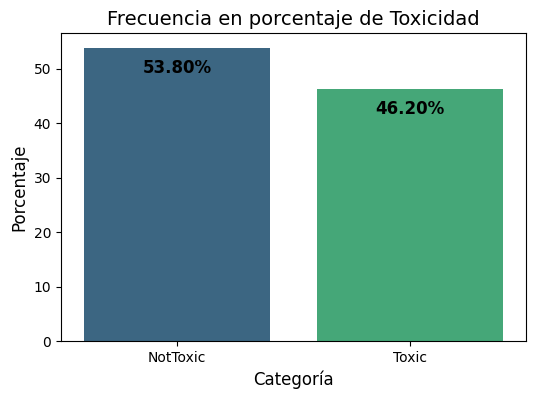

In [31]:
# Contar las frecuencias de 'IsToxic' y 'NotToxic'
toxicity_counts = df['IsToxic'].value_counts()

# Renombrar las categorías para hacer el gráfico más comprensible
toxicity_counts.index = ['NotToxic', 'Toxic']

# Calcular el porcentaje de cada categoría
toxicity_percentages = toxicity_counts / toxicity_counts.sum() * 100

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=toxicity_percentages.index, y=toxicity_percentages.values, palette='viridis')

# Agregar las etiquetas con el porcentaje dentro de las barras, centradas y arriba
for p in ax.patches:
    height = p.get_height()  # Obtener la altura de cada barra
    ax.annotate(f'{height:.2f}%', 
                (p.get_x() + p.get_width() / 2., height - 2),  # Centrado dentro de la barra, ajustado para estar arriba
                ha='center', va='top',  # Alineación centrada horizontalmente y hacia la parte superior
                fontsize=12, color='black',  # Color blanco para el texto
                fontweight='bold')

# Añadir título y etiquetas
plt.title('Frecuencia en porcentaje de Toxicidad', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)

# Mostrar el gráfico
plt.show()



In [33]:
# Guardar el dataset 
df_cleaned.to_csv("../data/youtube_cln_proc.csv")